In [0]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"]="0"

#                                               Lab 1 - Weightage - 3%

##  Decision Trees and Random Forests



### Dataset used : Amazon Fine food reviews.
### Maximum points in lab : 75 pts.
#### Important points to remember :
 1. Observations for the experiments done should be explained.
 2. All the code should be submitted in form of single Jupyter notebook itself.
 3. Points for each sub-section are mentioned in appropriate question.
 4. Make sure to begin early since few experiments may consume more time to run.
 5. You can use Google colab to run in jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)
 6. The lab must be submitted on Google classroom. The code as well as the accompanying observations should be made part of the python notebook.
 7. __The lab is due on Feb 7th 11.59pm.__
 8. __The lab should be completed individually. Students are expected to follow the honor code of the class.__

### 1. Go through [scikit learn DecisionTree documentation] : https://scikitlearn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
### Explain briefly various options available in corresponding DecisionTree classifier in scikit-learn package. [5 pts]




The decision tree classifier offers many hyperparameters to set:

1. **criterion**: The function which decides the attribute over which we split the decision tree. Options: 'gini' and 'entropy'
2. **splitter**: The strategy used to choose the split at each node. 'random' chooses at random among best splits while 'best' just chooses the best one.
3. max_depth: This limits the depth of the tree.
4. min_samples_split: Minimum samples required to split the node.
5. min_samples_leaf: Minimum samples required to be a leaf node.
6. min_weight_fraction_leaf: Minimum weighted fraction of total of weights of samples required to be at a leaf node.
7. max_features: number of features to consider for split.
8. random_state: used as the seed for the random number generator.
9. max_leaf_nodes: Sets the upper limit for number of leaf nodes. It chooses the best nodes according to relative reduction in impurity.
10. min_impurity_decrease: Node will be split if it decreases the impurity greater than given value.
11. min_impurity_split: threshold for early stopping. Stops splitting if impurity is below threshold.
12. class_weight: It allows us to set weight for each type of class output.
13. ccp_alpha: Chooses subtree with cost complexity smaller than given value will be choosen. Used for Post Pruning.

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5 
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review

Out of above attributes we will consider <strong>Score as Y or Output variable</strong>, and  <strong>Summary as X or data points.</strong>



### Import Libraries

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from IPython.display import HTML
import matplotlib.pyplot as plt
from sklearn import model_selection
import pickle
import sqlite3
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import random
import graphviz

### 2.  Dataset loading, train test split, print two data points after converting score column into positive, negative class - [5 pts]
#### steps :
 Use score column as the output variable and Summary as the input variable
 1. Convert score column as score > 3 - positive class and score <=3 as negative class.
 2. Now define train test split as 0.25.

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [0]:
cd drive/My\ Drive

In [0]:
# connecting to the dataset server to download the amazon fine foods dataset. Do not make any changes to the code below
con = sqlite3.connect('datasets/amazon-fine-food-reviews/database.sqlite')
# con = sqlite3.connect('database.sqlite')
#Make change.
messages = pd.read_sql_query("""
SELECT Score, Summary
FROM Reviews
""", con)

# the parition function applied threshold on the rating to label a review as 'positive' or 'negative'.
def partition(x):
    if x > 3:
        return 1
    else: return 0
Score = messages['Score']
Score = Score.map(partition)
Summary = messages['Summary']

# call the function to create the train and test splits according to the ratio 75:25
# uncomment and complete the line below

train_X, test_X, train_y, test_y = train_test_split(Summary, Score, test_size=0.25, random_state=42)

# print an example of the dataset after the labeling process
print(messages.head(2))
tmp = messages
tmp['Score'] = tmp['Score'].map(partition)
print(tmp.head(2))

   Score                Summary
0      5  Good Quality Dog Food
1      1      Not as Advertised
   Score                Summary
0      1  Good Quality Dog Food
1      0      Not as Advertised


In [0]:
# do not change make any changes to the code below. This part of the
# code removes stop words and transforms all the words and letters
# into a uniform representation. Further, it also removes punctuation
# marks.
nltk.download('punkt')
stemmer = PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return ' '.join(stems)

intab = string.punctuation
outtab = "                                "
trantab = str.maketrans(intab, outtab)

corpus = []
count_train_x=0
for text in train_X:
    count_train_x=count_train_x+1
    text = text.lower()
    text = text.translate(trantab)
    text=tokenize(text)
    corpus.append(text)
        
count_test_x=0
test_set=[]
for text in test_X:
    count_test_x=count_test_x+1
    text = text.lower()
    text = text.translate(trantab)
    text=tokenize(text)
    test_set.append(text)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(corpus)        
X_test_counts = count_vect.transform(test_set)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### 4. Print before and after using data pre-processing for five data points - [5 pts]
For example, following are some outputs that we were able to generate

 ID | Before preprocessing | After preprocessing 
 -|-|-
 45612 | Good Strong Flavor|good strong flavor 
 180139 | GREAT SIDE DISH | great side dish 
 541273 | Its agar | it agar 
 102774 | Great product! | great product
 447382 | Love them | love them 

In [0]:
# Data before the processing step is stored in the variable train_X 
# and the processed data is present in corpus. Print randomly 5 
# instances to check the success of the processing step. 
# insert your code here
tmp = train_X.to_frame()
tmp['After Preprocessing'] = corpus
tmp.columns = ['Before Preprocessing', 'After Preprocessing']
print(tmp.sample(5))

                          Before Preprocessing                  After Preprocessing
559800            Coconut taste too pronounced            coconut tast too pronounc
383694            Great tasting instant coffee             great tast instant coffe
180459                    Amazon comes through                  amazon come through
186146  THERE IS NO FLAVOR AT ALL... DON'T BUY  there is no flavor at all don t buy
75343                                excellent                                excel


### 5. Build a basic decision tree choosing appropriate min_samples_leaf parameter so that tree fits in output cell using Graphviz package [5 pts]
Use the decision tree classifier from the sklearn library to learn a decision tree from the training dataet. For now, we would like to only visualize the tree to ensure that we are calling the correct function. Set the min_samples_leaf parameter to a high value (>15000) for learning the tree. This tree will not be accurate, but will be big enough for us to visualize it. Identify the functions in the tree package that will help to visualize the tree and plot it. Below is a sample tree generated when mi_samples_leaf was set to 20000
![tree.png](attachment:tree.png)

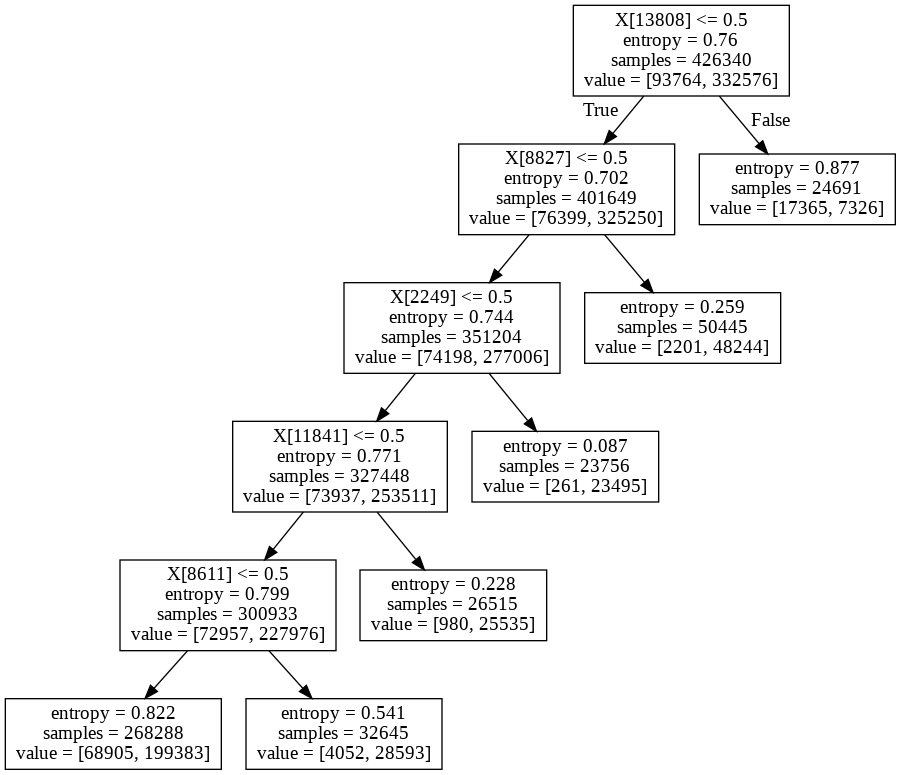

In [0]:
from sklearn import tree
import pydotplus
from IPython.display import Image
tmp_tree = tree.DecisionTreeClassifier(min_samples_leaf=20000,random_state=42,criterion='entropy')
tmp_tree.fit(X_train_counts, train_y)
graph = pydotplus.graph_from_dot_data(tree.export_graphviz(tmp_tree))
Image(graph.create_png())

### 6. Experiments with different tree parameters
#### a. minimum number of samples in a node.  [5 pts]
By now we should have all the code in place for learning accurate decision trees. As we discussed in the class, one method to prevent overfitting a decision tree is to put constraints on the number of samples assigned to a split node during training. We had used this parameter to learn extremely short decision trees in the previous step. Let us now vary this parameter and investigate the impact on the train and test accuracy of the model. 
The first part of the code should loop around different values for min_samples_split and save the resulting train and test accuracy. In the second part, plot a graph with x-axis being the number of samples in the node and accuracy being the y axis. Plot both the train and test accuracies in the same figure. Write a generic function for the plotting as we will use it later for other visualizations.

**All the accuracies mentioned below are in this order: first Training Accuracy then Testing Accuracy.**

In [0]:
def plot_accuracy(test_accuracy_list,train_accuracy_list, xlabel, ylabel, title, vals_x):
    fig, ax = plt.subplots()
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
    ax.grid()
    ax.plot(vals_x, test_accuracy_list, 'r', label='Test Accuracy')
    ax.plot(vals_x, train_accuracy_list, 'g', label='Train Accuracy')
    ax.legend()
    plt.show()

In [0]:
test_accuracy_list=[]
train_accuracy_list=[]
min_samples_split = [10,50,100,200]
for i in min_samples_split:
    tmp_tree = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=i, random_state=42)
    tmp_tree.fit(X_train_counts, train_y)
    train_acc_ = tmp_tree.score(X_train_counts, train_y)
    test_acc_ = tmp_tree.score(X_test_counts, test_y)
    print(train_acc_, test_acc_)
    test_accuracy_list.append(test_acc_)
    train_accuracy_list.append(train_acc_)

0.9729089459117136 0.9151385507409544
0.9538326218511047 0.9108040024205919
0.9439273819017685 0.9065398201443912
0.9338509171084112 0.903809617630916


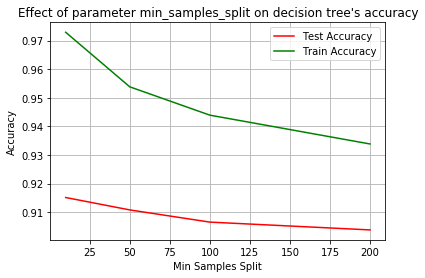

In [0]:
plot_accuracy(test_accuracy_list,train_accuracy_list, 'Min Samples Split', 'Accuracy', 'Effect of parameter min_samples_split on decision tree\'s accuracy', min_samples_split)

**Observations**: Minimum samples required to split the node. It specifies the maximum number of samples that can be in a leaf node. So it controls the depth of the tree. As the min_samples_split increases the train accuracy decreases as the depth is being reduced. The test accuracy also suffers from decreasing the depth as the tree is being too harshly pruned to learn the target concept.

#### b. maximum number of leaf nodes in the tree [5 pts]
The tree learner has a parameter max_leaf_nodes. Discuss the role of this parameter during the tree learning. Investigate the impact of this parameter on the train and test accuracy.

In [0]:
test_accuracy_list=[]
train_accuracy_list=[]
max_leaf_nodes=1000
step_size_2=50
for i in range(2, max_leaf_nodes,step_size_2):
    tree_maxl = tree.DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=i, random_state=42)
    tree_maxl.fit(X_train_counts, train_y)
    train_acc_ = tree_maxl.score(X_train_counts, train_y)
    test_acc_ = tree_maxl.score(X_test_counts, test_y)
    print(train_acc_, test_acc_)
    test_accuracy_list.append(test_acc_)
    train_accuracy_list.append(train_acc_)

0.8036191771825304 0.8046779346158718
0.8453417460242999 0.8438999676316197
0.8581742271426561 0.8565377091630663
0.8638856311863771 0.863159153918685
0.8682553830276305 0.8673318603374756
0.8713679223155228 0.8697454156522229
0.8741145564572876 0.8721941539890511
0.8760402495660741 0.8738266462136032
0.8778017544682648 0.8756139437353111
0.8799643477037107 0.8777882544999085
0.8824013697987522 0.8794488931421254
0.8838227705587091 0.8806451158928748
0.8850002345545809 0.8817217163685492
0.8860651123516442 0.8827138775912295
0.8869493831214523 0.8835019772858409
0.8878688370783882 0.8842197109362906
0.8886569404700474 0.8849233713779079
0.8894614626823661 0.8854792631267855
0.8902847492611531 0.8861336673374897
0.8909368109959187 0.8865629002068761


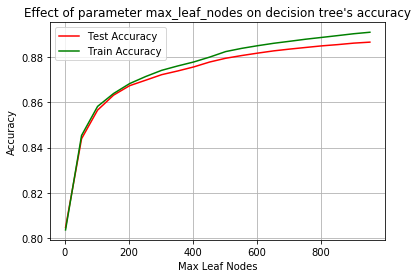

In [0]:
plot_accuracy(test_accuracy_list,train_accuracy_list, 'Max Leaf Nodes', 'Accuracy', 'Effect of parameter max_leaf_nodes on decision tree\'s accuracy', np.arange(2, max_leaf_nodes, step_size_2))

**Observations**: This hyperparameter sets upper limit on maximum number of leaf nodes. It also controls the depth of the tree. As it increases, training accuracy increases as tree grows more complex. Also testing accuracy increases as tree is less harshly pruned and it becomes more close to target concept.


#### c. splitting criteria [5 pts]
Identify the default splitting critera and experiment with other criterion implemented in the tree package. Report the accuracy on the test dataset as well as other parameters chracterizing the learned decision tree. 

In [0]:
import time
test_accuracy_list_gini=[]
test_accuracy_list_entropy=[]
max_leaf_nodes=1000
step_size_2=50
crit=["gini", "entropy"]
for i in range(2, max_leaf_nodes, step_size_2):
    #Gini
    st = time.time()
    tree_dep = tree.DecisionTreeClassifier(criterion='gini', random_state=42, max_leaf_nodes = i)
    tree_dep.fit(X_train_counts, train_y)
    test_acc_g = tree_dep.score(X_test_counts, test_y)
    end = time.time()
    print("Criterion = gini -> Testing Accuracy: ", test_acc_g, " Time: ", end-st)
    test_accuracy_list_gini.append(test_acc_g)
    #Entropy
    st = time.time()
    tree_dep_2 = tree.DecisionTreeClassifier(criterion='entropy', random_state=42, max_leaf_nodes = i)
    tree_dep_2.fit(X_train_counts, train_y)
    test_acc_e = tree_dep_2.score(X_test_counts, test_y)
    end = time.time()
    print("Criterion = entropy -> Testing Accuracy: ", test_acc_e, " Time: ", end-st)
    test_accuracy_list_entropy.append(test_acc_e)

Criterion = gini -> Testing Accuracy:  0.8046779346158718  Time:  0.3013498783111572
Criterion = entropy -> Testing Accuracy:  0.8046779346158718  Time:  0.28946900367736816
Criterion = gini -> Testing Accuracy:  0.8475238189059487  Time:  3.3930909633636475
Criterion = entropy -> Testing Accuracy:  0.8438999676316197  Time:  3.4507811069488525
Criterion = gini -> Testing Accuracy:  0.8603726585698805  Time:  5.625769376754761
Criterion = entropy -> Testing Accuracy:  0.8565377091630663  Time:  5.51481294631958
Criterion = gini -> Testing Accuracy:  0.8668111516106788  Time:  5.95962929725647
Criterion = entropy -> Testing Accuracy:  0.863159153918685  Time:  5.756261825561523
Criterion = gini -> Testing Accuracy:  0.8709275651941399  Time:  7.057619094848633
Criterion = entropy -> Testing Accuracy:  0.8673318603374756  Time:  6.918354511260986
Criterion = gini -> Testing Accuracy:  0.8732566812558932  Time:  8.285351514816284
Criterion = entropy -> Testing Accuracy:  0.869745415652222

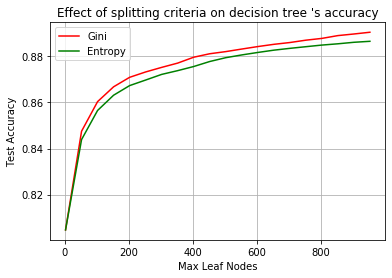

In [0]:
fig, ax = plt.subplots()
ax.set(xlabel='Max Leaf Nodes', ylabel='Test Accuracy', title='Effect of splitting criteria on decision tree \'s accuracy')
ax.grid()
ax.plot(np.arange(2, max_leaf_nodes, step_size_2), test_accuracy_list_gini, 'r', label='Gini')
ax.plot(np.arange(2, max_leaf_nodes, step_size_2), test_accuracy_list_entropy, 'g', label='Entropy')
ax.legend()
plt.show()

Gini impurity and entropy are options available for criteria. Gini is the default metric.

**Observations:** Gini and entropy are two selection criteria for decision tree. It determines the best split point. Gini index are very similar in their outputs. In ID3, information gain or entropy is used for determining split point. Gini performs marginally better than entropy. It is however slightly slower than entropy. 

#### d. depth of the decision tree [5 pts]
Investigate the impact of depth of the decision tree on the test accuracy

In [0]:
test_accuracy_list=[]
train_accuracy_list=[]
maximum_depth=1000
step_size=50
for i in range(1, maximum_depth,step_size):
    tree_dep = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=42)
    tree_dep.fit(X_train_counts, train_y)
    train_acc_ = tree_dep.score(X_train_counts, train_y)
    test_acc_ = tree_dep.score(X_test_counts, test_y)
    print(train_acc_, test_acc_)
    test_accuracy_list.append(test_acc_)
    train_accuracy_list.append(train_acc_)

0.8036191771825304 0.8046779346158718
0.881024534409157 0.8666211632914421
0.9125439789839096 0.8873509999014876
0.9292583384153492 0.8969911479516445
0.9412088943097059 0.9024374797697623
0.9498686494347235 0.9062583559677442
0.9550499601257213 0.9081089829291977
0.959250832668762 0.9099807197038997
0.9628582821222499 0.9113317477518049
0.9653586339541211 0.9122957625568205
0.9669981704742694 0.9128235078880336
0.967884786789886 0.9132808871750848
0.9689731200450344 0.9142167555624358
0.9698480086316086 0.914350451046343
0.9704203218088849 0.914385634068424
0.9714077965942675 0.9145334027611636
0.9728854904536286 0.915279282829278
0.9740793732701599 0.9157014790942483
0.9748885865740958 0.9156381496545027
0.9759042079091804 0.9161518217768834


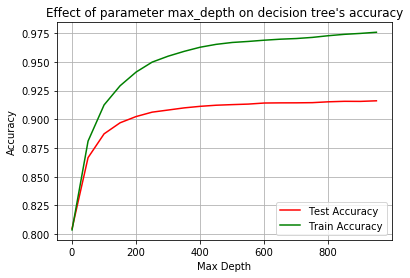

In [0]:
plot_accuracy(test_accuracy_list,train_accuracy_list, 'Max Depth', 'Accuracy', 'Effect of parameter max_depth on decision tree\'s accuracy', np.arange(1, maximum_depth, step_size))

**Observations**: This hyperparameter decides maximum depth of the decision tree. If it is too small, the tree might not be complex enough to approximate the target concept and lead to low prediction accuracy. On the other hand large depth may lead to overfitting causing low testing accuracy. As we can see in the plot, on increasing the depth the training as well as testing accuracy rises. However both have began to plateau and may decrease later.

### 7. Random forest
Now, let us explore an ensemble of decision trees - random forest. Fortunately, sklearn has an ensemble library containing the random forest classifier. Let us learn a random forest using both instance and feature bagging independently.
#### a. briefly describe the input parameters to the random forest classifier [5 pts]
1. n_estimators: Sets the number of trees in the forest.
2. criterion: The function which decides the attribute over which we split the decision tree. Options: 'gini' and 'entropy'
3. splitter: The strategy used to choose the split at each node. 'random' chooses at random among best splits while 'best' just chooses the best one.
4. max_depth: This limits the depth of the tree.
5. min_samples_split: Minimum samples required to split the node.
6. min_samples_leaf: Minimum samples required to be a leaf node.
7. min_weight_fraction_leaf: Minimum weighted fraction of total of weights of samples required to be at a leaf node.
8. max_features: number of features to consider for split.
9. max_leaf_nodes: Sets the upper limit for number of leaf nodes. It chooses the best nodes according to relative reduction in impurity.
10. min_impurity_decrease: Node will be split if it decreases the impurity greater than given value.
11. min_impurity_split: threshold for early stopping. Stops splitting if impurity is below threshold.
12. class_weight: It allows us to set weight for each type of class output.
13. ccp_alpha: Chooses subtree with cost complexity smaller than given value will be choosen. Used for Post Pruning.
14. random_state: used as the seed for the random number generator.
15. bootstrap: Set whether bootstrap samples are used when building tree. 
16. oob_score: Set whether to use out of bag samples.
17. n_jobs: Sets number of jobs run in parallel. Speeds up the execution if multiple CPUs available.
18. max_samples: Sets maximum samples for each decision tree. (Instance bagging)

#### b. instance bagging [10 pts]
As discussed in the class, instances are sampled with replacement to create multiple synthetic training sets. Decision tree is learned for every training set. An ensemble strategy (majority voting) is applied on the output of all the trees for a test instance. Let us vary the number of instances in each bag to learn the random forest and check if there is impact on the performance of the ensemble. 

In [0]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
import random
test_accuracy_list=[]
train_accuracy_list=[]
number_of_instances = [1000,5000,10000,20000]
for i in number_of_instances:
    rnd_tree = RandomForestClassifier(criterion='entropy', max_samples=i, random_state=42)
    rnd_tree.fit(X_train_counts, train_y)
    train_acc_ = rnd_tree.score(X_train_counts, train_y)
    test_acc_ = rnd_tree.score(X_test_counts, test_y)
    print(train_acc_, test_acc_)
    test_accuracy_list.append(test_acc_)
    train_accuracy_list.append(train_acc_)

0.848909321199043 0.8476997340163531
0.8841065816015387 0.8806662257061233
0.8951845944551297 0.8901586050635405
0.9098254913918469 0.8996298746077093


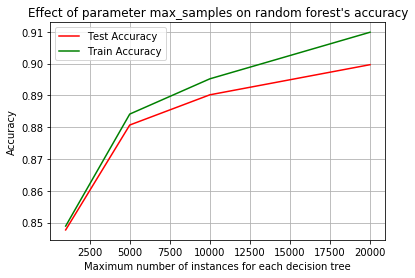

In [0]:
plot_accuracy(test_accuracy_list,train_accuracy_list, 'Maximum number of instances for each decision tree', 'Accuracy', 'Effect of parameter max_samples on random forest\'s accuracy', number_of_instances)

**Observations:** This parameter defines the number of nodes each decision tree would have. Instances would be selected randomly to form different trees. Here the major vote would be given as output. As number of instances for each decision tree in the random forest increases, the training accuracy increases as each tree has become more complex. Testing accuracy also increases due to the same reason. Increasing instances per decision tree however requires much more time to execute.

#### c. feature bagging [10 pts]
For performing feature bagging, we sample a subset of features from the initial set of features. A decision tree is learned for every training set that contains all the instances characterized by a subset of features. An ensemble strategy is applied for classifying a test instance. In this experiment we will investigate the impact of varying the number of features bagged on the test accuracy.

In [0]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
test_accuracy_list=[]
train_accuracy_list=[]
number_of_features = [1000,10000,15000,20000]
for i in number_of_features:
    # insert your code here
    rnd_tree = RandomForestClassifier(criterion='entropy', max_features=i, random_state=42, n_jobs=4, n_estimators=20)
    rnd_tree.fit(X_train_counts, train_y)
    train_acc_ = rnd_tree.score(X_train_counts, train_y)
    test_acc_ = rnd_tree.score(X_test_counts, test_y)
    print('Training Accuracy: ', train_acc_, '\tTesting Accuracy: ', test_acc_)
    test_accuracy_list.append(test_acc_)
    train_accuracy_list.append(train_acc_)

Training Accuracy:  0.983804006192241 	Testing Accuracy:  0.9225129121691037
Training Accuracy:  0.9831730543697519 	Testing Accuracy:  0.9201204666676048
Training Accuracy:  0.9831660177323263 	Testing Accuracy:  0.9202963817780092
Training Accuracy:  0.9831284889993902 	Testing Accuracy:  0.9198249292821257


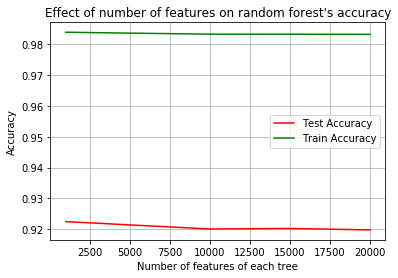

In [0]:
plot_accuracy(test_accuracy_list,train_accuracy_list, 'Number of features of each tree', 'Accuracy', 'Effect of number of features on random forest\'s accuracy', number_of_features)

**Observations:** 
This hyperparameter sets the limit for features on which each decision tree would be split. This results in different trees with lesser correlation to make for better prediction. As number of features per tree increases each tree is starting to overfit. This causes more variance in output of each tree leading to decrease in training as well as testing accuracy, however the decrease in both are very slight even after large change in number of features. The number of estimators has been reduced to decrease execution time.

#### d. number of trees in the forest [10 pts]
Finally let us vary the number of trees in the random forest. We will use the default random forest classifier and only vary the number of trees learned in the ensemble. Again make your observations on the test accuracy as the number of trees are varied.

In [0]:
test_accuracy_list=[]
train_accuracy_list=[]
number_of_trees = [1,2,5,10,50]
for i in number_of_trees:
    rnd_tree = RandomForestClassifier(criterion='entropy', n_estimators=i, random_state=42)
    rnd_tree.fit(X_train_counts, train_y)
    train_acc_ = rnd_tree.score(X_train_counts, train_y)
    test_acc_ = rnd_tree.score(X_test_counts, test_y)
    print(train_acc_, test_acc_)
    test_accuracy_list.append(test_acc_)
    train_accuracy_list.append(train_acc_)

0.9541586527184875 0.899010653419086
0.9569545433222311 0.8941553963719268
0.9772341323826055 0.9179954121339207
0.9821269409391565 0.9212674331874411
0.9852207158605808 0.9256864207607977


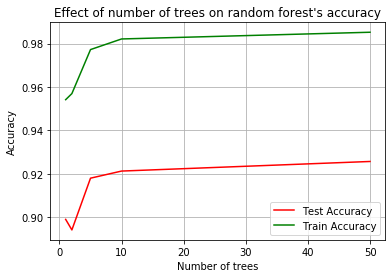

In [0]:
plot_accuracy(test_accuracy_list,train_accuracy_list, 'Number of trees', 'Accuracy', 'Effect of number of trees on random forest\'s accuracy', number_of_trees)

**Observations:** 
This hyperparameter decides the number of trees the forest would have. More estimators means the majority output has higher probability of being true as the individual decision trees have small correlation which implies the agreed output is likely to be correct output.
As number of trees increase the training as well as testing accuracy improves because *average vote* decreases variance of answer and is more likely to be correct than individual answer(Central limit theorem). However we see a dip in testing accuracy when number of trees in the forest is 2. It is because in case of two voters, we are unable to decide the right output which may lead to dip in testing accuracy.